<a href="https://colab.research.google.com/github/SanitCoder/Time-Series-Analysis-SOC-24/blob/main/FeatureEngineering2ZScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('heights.csv')
df.head()

Saving heights.csv to heights.csv


,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


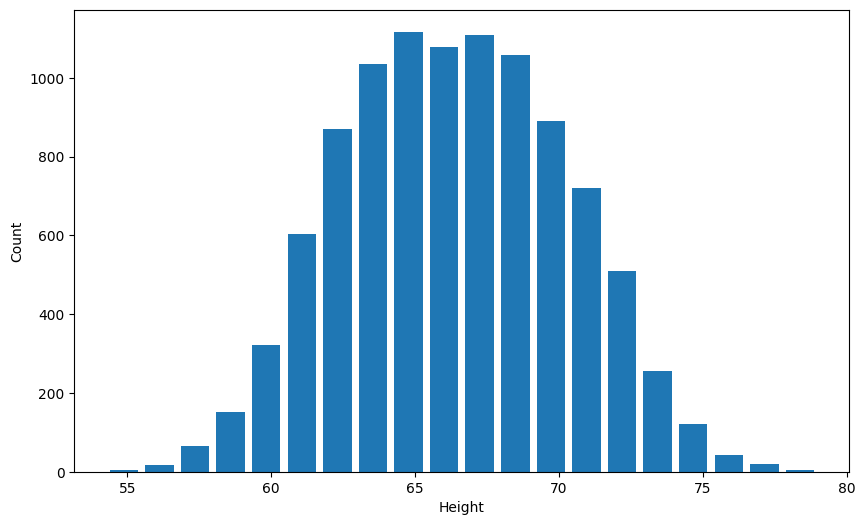

In [4]:
plt.hist(df.height,bins = 20,rwidth = 0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

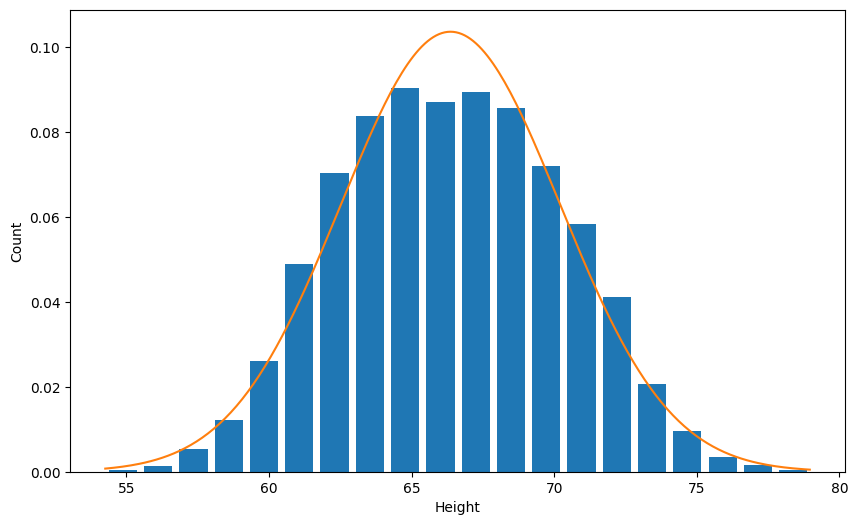

In [5]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height,bins = 20,rwidth = 0.8,density = True)
plt.xlabel('Height')
plt.ylabel('Count')

rng = np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))
plt.show()

In [6]:
df.height.mean()

66.367559754866

In [7]:
df.height.std()

3.847528120795573

In [8]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [9]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392479274

In [10]:
df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [13]:
df_no_outlier_std_dev = df[(df.height < upper_limit) & (df.height > lower_limit)]
df_no_outlier_std_dev

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [14]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

In [15]:
df['zscore'] = (df.height - df.height.mean())/df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [17]:
df_no_outliers = df[(df.zscore < 3) & (df.zscore > -3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
